In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\MYPC\Downloads\ece_student_attendance_dataset1.csv')
df.head()

,Student ID,Date,Subject Name,Lecturer Name,Percentage Attended,Attendance Status
0,S1000,3/24/2024,Microprocessors,T. Gupta,99.82,Present
1,S1001,3/3/2024,Embedded Systems,S. Reddy,83.01,Absent
2,S1002,4/20/2024,Antenna and Wave Propagation,M. Das,85.21,Present
3,S1003,1/31/2024,Communication Systems,R. Sharma,75.84,Absent
4,S1004,6/21/2024,Embedded Systems,T. Gupta,62.09,Present


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Student ID           1000 non-null   object 
 1   Date                 1000 non-null   object 
 2   Subject Name         1000 non-null   object 
 3   Lecturer Name        1000 non-null   object 
 4   Percentage Attended  1000 non-null   float64
 5   Attendance Status    1000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB


In [4]:
df.isna().sum()

Student ID             0
Date                   0
Subject Name           0
Lecturer Name          0
Percentage Attended    0
Attendance Status      0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,Percentage Attended
count,1000.00000
mean,68.90329
std,17.32297
min,40.05000
25%,53.23750
50%,68.47500
75%,84.11500
max,99.91000


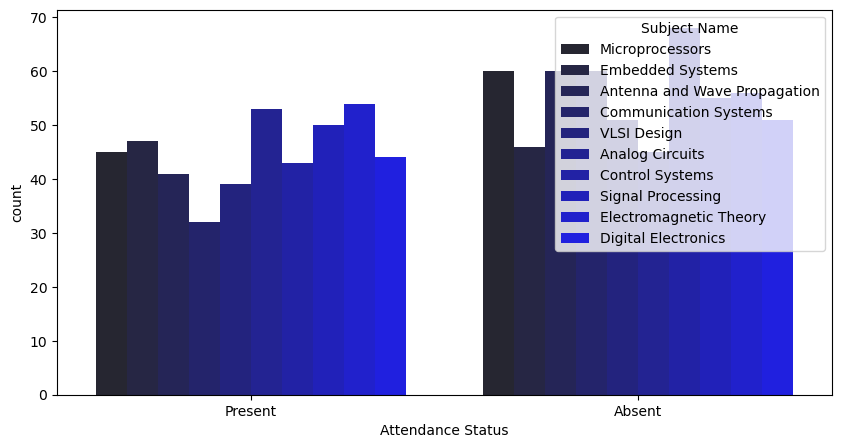

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Attendance Status',hue ='Subject Name', palette='dark:Blue')
plt.show()

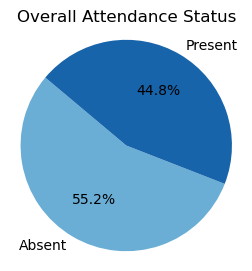

In [8]:
# Count attendance status
attendance_counts = df['Attendance Status'].value_counts()

# Plot pie chart
plt.figure(figsize=(3,3))
plt.pie(attendance_counts, labels=attendance_counts.index, autopct='%1.1f%%', 
        colors=plt.cm.Blues([0.5, 0.8]), startangle=140)
plt.title("Overall Attendance Status")
plt.axis('equal')  # Equal aspect ratio to ensure pie is a circle
plt.show()


In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [11]:
df.head()

,Student ID,Date,Subject Name,Lecturer Name,Percentage Attended,Attendance Status,Year,Month,Day
0,S1000,2024-03-24,Microprocessors,T. Gupta,99.82,Present,2024,3,24
1,S1001,2024-03-03,Embedded Systems,S. Reddy,83.01,Absent,2024,3,3
2,S1002,2024-04-20,Antenna and Wave Propagation,M. Das,85.21,Present,2024,4,20
3,S1003,2024-01-31,Communication Systems,R. Sharma,75.84,Absent,2024,1,31
4,S1004,2024-06-21,Embedded Systems,T. Gupta,62.09,Present,2024,6,21


In [12]:
df.drop(columns=['Student ID','Date'],axis=1,inplace=True)

In [13]:
df['Year'].value_counts() ## from this observation we can drop the year column

Year
2024    1000
Name: count, dtype: int64

In [14]:
df.drop('Year',axis=1,inplace =True)

In [15]:
x=df.drop('Attendance Status',axis=1)
y=df['Attendance Status']
x.shape,y.shape

((1000, 5), (1000,))

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Attendence Status Encoded'] = le.fit_transform(y)

In [18]:
x = pd.get_dummies(x, columns=['Subject Name', 'Lecturer Name'], drop_first=True)

In [19]:
# df.drop(columns=['Subject Name','Lecturer Name','Attendance Status'],axis=1,inplace=True)

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled.shape

(1000, 19)

In [21]:
x.head()

,Percentage Attended,Month,Day,Subject Name_Antenna and Wave Propagation,Subject Name_Communication Systems,Subject Name_Control Systems,Subject Name_Digital Electronics,Subject Name_Electromagnetic Theory,Subject Name_Embedded Systems,Subject Name_Microprocessors,Subject Name_Signal Processing,Subject Name_VLSI Design,Lecturer Name_L. Kumar,Lecturer Name_M. Das,Lecturer Name_N. Rao,Lecturer Name_R. Sharma,Lecturer Name_S. Reddy,Lecturer Name_T. Gupta,Lecturer Name_V. Iyer
0,99.82,3,24,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
1,83.01,3,3,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
2,85.21,4,20,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,75.84,1,31,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,62.09,6,21,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False


In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.3,random_state=1)

In [56]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((700, 19), (300, 19), (700,), (300,))

In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [66]:
print(f"Accuracy: {train_accuracy}")
print("Confusion Matrix:")
print(train_conf_matrix)
print("Classification Report:")
print(train_class_report)

Accuracy: 0.8471428571428572
Confusion Matrix:
[[340  47]
 [ 60 253]]
Classification Report:
              precision    recall  f1-score   support

      Absent       0.85      0.88      0.86       387
     Present       0.84      0.81      0.83       313

    accuracy                           0.85       700
   macro avg       0.85      0.84      0.84       700
weighted avg       0.85      0.85      0.85       700



In [61]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

# 6. Predict and evaluate
y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7766666666666666
Confusion Matrix:
 [[136  29]
 [ 38  97]]
Classification Report:
               precision    recall  f1-score   support

      Absent       0.78      0.82      0.80       165
     Present       0.77      0.72      0.74       135

    accuracy                           0.78       300
   macro avg       0.78      0.77      0.77       300
weighted avg       0.78      0.78      0.78       300

